## SQL

### Un poco de historia

Junto con la definición de **modelo relacional** del Dr. Codd, este propuso un lenguaje llamado DSL/Alpha para manipular los datos en tablas relacionales. Poco después de que se publicara el artículo de Codd, IBM encargó a un grupo que construyera un prototipo basado en las ideas de Codd. Este grupo creó una versión simplificada de DSL/Alpha a la que llamaron SQUARE.

Los refinamientos de SQUARE llevaron a un lenguaje llamado **SEQUEL** (Structure English Query Language), que finalmente se acortó a **SQL (Structure Query Language)**. Si bien **SQL** comenzó como un lenguaje utilizado para manipular datos en bases de datos relacionales, **ha evolucionado para convertirse en un lenguaje que permite manipular información contenida en varias tecnologías de bases de datos**.

**SQL** tiene ahora más de 40 años y ha sufrido muchos cambios a lo largo del tiempo. A mediados de la década de 1980, el Instituto Nacional Estadounidense de Estándares (ANSI) comenzó a trabajar en el primer estándar para el lenguaje **SQL**, que se publicó en 1986. Los refinamientos posteriores llevaron a nuevas versiones del estándar **SQL** en 1989, 1992, 1999, 2003, 2006, 2008, 2011 y 2016. Junto con las mejoras al lenguaje central, se agregaron nuevas características al lenguaje **SQL** para incorporar funcionalidad orientada a objetos, entre otras cosas. Los estándares posteriores se centran en la integración de tecnologías relacionadas, como el lenguaje de marcado extensible (XML) y la notación de objetos de JavaScript (JSON).

**SQL** va de la mano con el **modelo relacional** porque el resultado de una consulta **SQL** es una **tabla** (también llamada, en este contexto, conjunto de resultados). Por lo tanto, se puede crear una nueva tabla permanente en una base de datos relacional simplemente almacenando el conjunto de resultados de una consulta. De manera similar, una consulta puede usar tablas permanentes y los conjuntos de resultados de otras consultas, como entradas.

___

### Clases de sentencias SQL

El lenguaje **SQL** se divide en diferentes partes o sublenguajes:

- **Data Definition Language (DDL)**: Es la parte de **SQL** que usamos para crear (**definir**) una base de datos, modificar su estructura e incluso destruir cuando ya no sea necesaria (**CREATE**, **ALTER**, **DROP**, **RENAME**, etc..).
<br>

- **Data Manipulation Language (DML)**: Es la parte de **SQL** que realiza la manipulación de la base de datos. Podemos especificar qué queremos hacer con los datos (**INSERT**, **UPDATE**, **DELETE**).
<br>

- **Data Query Language (DQL)**: Esta parte se compone de un solo comando **SELECT** que busca información en la base de datos.
<br>

- **Data Control Language (DCL)**: Esta parte de **SQL** protege la base de datos de entradas no permitidas. Otorga seguridad a la base de datos permitiendo o denegando accesos a determinados usuarios (**GRANT**, **REVOKE**).
<br>

Por ejemplo, para crear una nueva tabla en su base de datos, usaría la declaración de definición **SQL CREATE table**, mientras que el proceso de ingesta de su nueva tabla con datos requeriría la declaración inserción de datos **SQL INSERT**.

Para tener una idea de cómo se ven estas declaraciones, aquí hay una sentencia **DDL** (declaración de datos) que crea una tabla llamada corporation:

```mysql
 CREATE TABLE corporation
 (corp_id SMALLINT,
  name VARCHAR(30),
  PRIMARY KEY (corp_id)
 );
```

Esta declaración crea una tabla con dos columnas, _**corp_id**_ y _**name**_, con la columna _**corp_id**_ identificada como la **primary key** de la tabla.
___

A continuación, presentamos una sentencia **DML** (sentencia de manipulación) que inserta una fila en la tabla corporation para una empresa llamada _"Acme Paper Corporation"_:

```mysql
 INSERT INTO corporation (corp_id, name) VALUES
 (27, 'Acme Paper Corporation');
```

Esta instrucción agrega una fila a la tabla **corporation** con un valor de **27** para la columna _**corp_id**_ y el valor **‘Acme Paper Corporation’** para la columna _**name**_.
___

Finalmente, tenemos una sentencia **DQL** (búsqueda de datos) con **SELECT** para recuperar los datos que se acaban de crear:

```mysql
 SELECT 
     name
 FROM
     corporation
 WHERE
     corp_id = 27;
```


| name                   |
|------------------------|
| Acme Paper Corporation |


Todos los elementos de la base de datos creados a través de declaraciones _**schema SQL**_ se almacenan en un conjunto especial de tablas llamado **‘diccionario de datos’**. Estos "datos sobre la base de datos" se conocen colectivamente como **metadata**. Al igual que las tablas que creamos, las tablas del diccionario de datos se pueden consultar mediante una declaración **SELECT**, lo que le permite descubrir las estructuras de datos actual desplegada en la base de datos en tiempo de ejecución. 
___

### SQL: un lenguaje no procedimental


Empezamos definiendo qué es un **lenguaje procedimental**: Un lenguaje procedimental define tanto los resultados como los procesos mediante los cuales alcanzamos los resultados.

Un **lenguaje no procedimental** define los resultados que queremos obtener, pero el proceso por el cual se alcanzan dichos resultados son realizados por un agente externo, esto es, no podemos definir nosotros los procesos para alcanzar dichos resultados.

En **SQL** tenemos que renunciar a parte del control al que estamos acostumbrados como en Python (if-else, for, while…), ya que las declaraciones de **SQL** definen entradas y salidas, pero no la forma en que se ejecuta una declaración, sino que lo deja a un componente de su motor de base de datos conocido como el optimizador (este, chequea las declaraciones **SQL** y en base a cómo están configuradas las tablas e índices, decide la ruta de ejecución más eficiente).

___

### Ejemplo de SQL

Partimos de una base de datos con dos tablas simples relacionadas entre sí por el id del cliente:

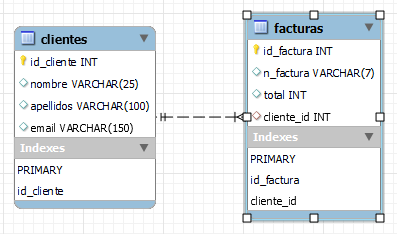
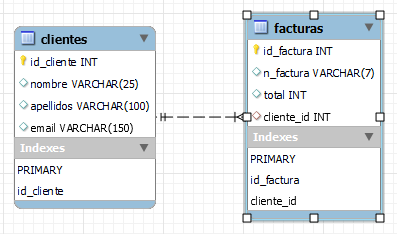

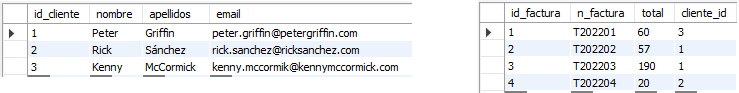

La siguiente instrucción **SQL** nos devolverá todas las facturas que correspondan al _**id_cliente**_ (en este caso Peter Griffin), junto con los campos que le indiquemos en el **SELECT**: _**id_cliente**_, el _**nombre**_, _**apellidos**_, _**n_factura**_ y _**total**_:

```mysql
 SELECT
     c.id_cliente, c.nombre, c.apellidos, c.email, f.n_factura, f.total
 FROM
     clientes c
 INNER JOIN
     facturas f ON c.id_cliente = f.cliente_id
 WHERE
     c.id_cliente = 1;
```



| id_cliente | nombre | apellidos | email                          | n_factura | total |
|------------|--------|-----------|--------------------------------|-----------|-------|
|          1 | Peter  | Griffin   | peter.griffin@petergriffin.com | T202202   |    57 |
|          1 | Peter  | Griffin   | peter.griffin@petergriffin.com | T202203   |   190 |

Sin entrar en demasiados detalles, esta consulta identifica la fila en la tabla _**clientes**_ para el **id_cliente = 1** (en la condición del **WHERE**) y las filas en la tabla de _**facturas**_ (f) donde el _**id_cliente**_ de la tabla **clientes** sea igual al _**cliente_id**_ de la tabla facturas (por medio del **INNER JOIN**) y devuelve los campos indicados en el **SELECT**.

Todo esto se profundiza más adelante.
___
La consulta anterior contiene tres cláusulas básicas diferentes: **SELECT**, **FROM** y **WHERE** (a parte del **INNER JOIN**).

A continuación te mostramos el papel de cada una de estas tres cláusulas:

```mysql
 SELECT /* seleciona una o más cosas */ ...
 FROM /* de uno o más lugares */ ...
 WHERE /* donde se aplican una o más condiciones */ ...
```
___

### ¿Qué es MySQL?

Las bases de datos relacionales han estado disponibles comercialmente durante más de tres décadas. Algunos de los productos (**RDBMS**) comerciales más populares son:

- Oracle Database de Oracle Corporation.

- SQL Server de Microsoft.

- DB2 Universal Database de IBM

Junto con los servidores de bases de datos comerciales, ha existido bastante actividad en la comunidad de código abierto en las últimas dos décadas con el objetivo de crear una alternativa viable. Dos de los servidores de bases de datos de código abierto más utilizados son **PostgreSQL** y **MySQL**. El servidor (**RDMBS - Relational DataBase Management System**) **MySQL** está disponible de forma gratuita, y es extremadamente simple de descargar e instalar.

In [ ]:
################################################################################################################################